In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from sklearn.exceptions import ConvergenceWarning 
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
from datetime import datetime
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm, metrics
from sklearn.metrics import f1_score
from sklearn.multiclass import OneVsRestClassifier


## Read MNIST data

In [13]:
import os
import struct
import numpy as np
import matplotlib.pyplot as pyplot


"""
Loosely inspired by http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
which is GPL licensed.
"""

def read(dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')
    else:
        raise Exception("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)
    
    return img, lbl

In [14]:
path = 'MNIST/'
X_train, y_train = read("testing", path)
X_test, y_test = read("training", path)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)
(60000, 784)
(60000,)


## Preprocessing with StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


## SVM training

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from sklearn.exceptions import ConvergenceWarning 
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
from datetime import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm, metrics
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# Preprocessing with StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# hyper_parameter
C  = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

df = pd.DataFrame(columns=['C value', 'f1 score', 'learning time'])
bookmark = 0

for c in C:
    # Model Instance
    classifier = svm.SVC(kernel = 'linear',
                         C = c, 
                         decision_function_shape= 'ovr',
                         random_state=108)
    
    # fit, prediction
    clf = classifier.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    
    
    score = cross_val_score(classifier, X_train_scaled, y_train, cv=5, scoring='f1_macro')
    
    df.loc[bookmark] = [c, score, end_time - begin_time]
    print(df.loc[bookmark])
    df.to_csv("SVC(linear)_ovr.csv", mode='w')

    bookmark = bookmark + 1                
    
    print('=======================================')

df.to_csv("SVC(linear)_ovr.csv", mode='w')

0.9215799399762041
0.9217899111317452


## Plot

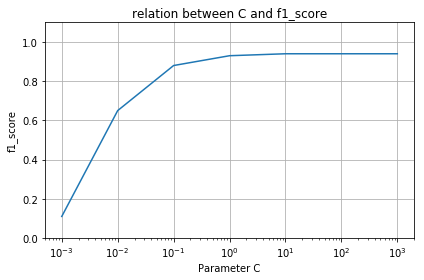

In [19]:
f1_score = [0.11, 0.65, 0.88, 0.93, 0.94, 0.94]
c = [0.001, 0.01, 0.1, 1.0, 10, 1000]
plt.title("relation between C and f1_score")
plt.plot(c, f1_score)

plt.grid()
plt.xscale('log')
plt.ylabel('f1_score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()

In [ ]:
f1_score = [0.11, 0.65, 0.88, 0.93, 0.94, 0.94]
c = [0.001, 0.01, 0.1, 1.0, 10, 1000]
plt.title("relation between C and f1_score")
plt.plot(c, f1_score)

plt.grid()
plt.xscale('log')
plt.ylabel('f1_score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()